<a href="https://colab.research.google.com/github/Devanshujoshi07/DATA_ANALYSIS-PROJECT/blob/main/world_University_Rank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install IPython
!pip install -qq -U datasets
import kagglehub
import datasets as load_dataset
# Download latest version

import pandas as pd
import IPython.display as display
import os
path = kagglehub.dataset_download("melissamonfared/qs-world-university-rankings-2025")

print("Path to dataset files:", path)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 8.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2025.3.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-cupti-cu12 12.5.82 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-nvrtc-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", b

100%|██████████| 68.8k/68.8k [00:00<00:00, 485kB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/melissamonfared/qs-world-university-rankings-2025/versions/1


In [ ]:
!ls {path}

'QS World University Rankings 2025 (Top global universities).csv'


In [ ]:
# csv_file=os.path.join(path,"QS World University Rankings 2025 (Top global universities).csv")
# df=pd.read_csv(csv_file)
# Assuming the file is encoded in 'latin1'
csv_file=os.path.join(path,"QS World University Rankings 2025 (Top global universities).csv")
try:
    df=pd.read_csv(csv_file, encoding='latin1')
except UnicodeDecodeError:
    # If 'latin1' doesn't work, try another common encoding like 'ISO-8859-1'
    df=pd.read_csv(csv_file, encoding='ISO-8859-1')

In [ ]:
df

,RANK_2025,RANK_2024,Institution_Name,Location,Region,SIZE,FOCUS,RES.,STATUS,Academic_Reputation_Score,...,International_Faculty_Rank,International_Students_Score,International_Students_Rank,International_Research_Network_Score,International_Research_Network_Rank,Employment_Outcomes_Score,Employment_Outcomes_Rank,Sustainability_Score,Sustainability_Rank,Overall_Score
0,1,1,Massachusetts Institute of Technology (MIT),United States,Americas,M,CO,VH,B,100.0,...,100,86.8,143,96.0,58,100.0,8,99.0,15=,100
1,2,6,Imperial College London,United Kingdom,Europe,L,FC,VH,A,98.5,...,66,99.6,44,97.4,34,93.4,61,99.7,6,98.5
2,3,3,University of Oxford,United Kingdom,Europe,L,FC,VH,A,100.0,...,120,97.7,73,100.0,1,100.0,3,85.0,126,96.9
3,4,4,Harvard University,United States,Americas,L,FC,VH,B,100.0,...,269,69.0,215,99.6,5,100.0,1,84.4,130,96.8
4,5,2,University of Cambridge,United Kingdom,Europe,L,FC,VH,A,100.0,...,73,94.8,98,99.3,10,100.0,5,84.8,127=,96.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1498,1401+,1201-1400,University of Montana Missoula,United States,Americas,M,CO,HI,A,3.0,...,701+,1.9,701+,6.5,701+,3.1,701+,1.0,701+,NaN
1499,1401+,1401+,University of Oradea,Romania,Europe,L,FC,MD,A,5.6,...,701+,5.2,701+,34.5,701+,6.2,701+,2.3,701+,NaN
1500,1401+,1201-1400,University of San Carlos,Philippines,Asia,M,CO,MD,C,7.2,...,701+,2.1,701+,6.4,701+,9.6,701+,1.0,701+,NaN
1501,1401+,1401+,"University Politehnica of Timisoara, UPT",Romania,Europe,L,FO,VH,A,4.1,...,701+,2.5,701+,18.6,701+,3.9,701+,1.1,701+,NaN


In [ ]:
# df['Employment_Outcomes_Score'] = pd.to_numeric(df['Employment_Outcomes_Score'], errors='coerce')
df['RANK_2025'] = pd.to_numeric(df['RANK_2025'], errors='coerce').astype('Int64')

# # Drop rows where the converted columns are NaN (optional, depending on how you want to handle non-numeric entries)
# df.dropna(subset=['Employment_Outcomes_Score', 'RANK_2025'], inplace=True)

In [ ]:
# df_INDIA=df[df['Location']=='India']
df_da_grp=df.groupby('Region')['RANK_2025'].count().sort_values(ascending=False).head().to_frame()

In [ ]:
df_da_grp

,RANK_2025
Region,
Europe,247
Asia,182
Americas,123
Oceania,39
Africa,9


In [ ]:
# df_pivot=df_India_top.pivot_table(index='Institution_Name',values='RANK_2025').aggfunc('mean').sort_values(by='Rank_2025',ascending=False)
import matplotlib.pyplot as plt
import seaborn as sns

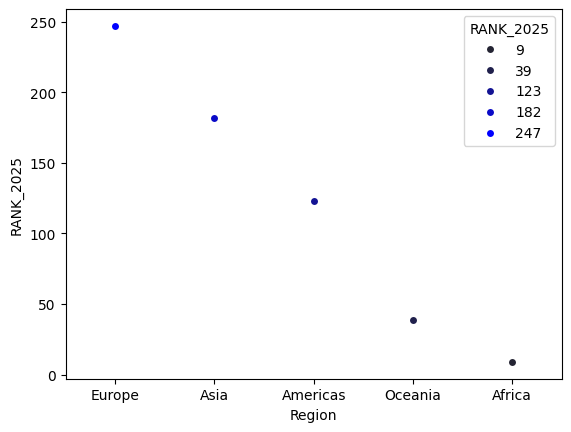

In [ ]:
# Different types of plotes
# sns.catplot(data=df_da_grp, x='Region',y='RANK_2025',kind='bar',hue='RANK_2025',palette='dark:b')

# plt.show()
# sns.heatmap(df_da_grp,annot=True,cmap='Blues')
# plt.show()
sns.swarmplot(data=df_da_grp,x='Region',y='RANK_2025',hue='RANK_2025',palette='dark:b')
plt.show()

In [ ]:
df_India=df[df['Location']=='India']

In [ ]:
df_grouped=df_India.groupby(['Institution_Name','Location','RANK_2025']).size()

In [ ]:
# df_grouped.sort_values(by='RANK_2025',ascending=False)
# Sort the Series based on the 'RANK_2025' level of the MultiIndex
df_India_top=df_grouped.sort_index(level='RANK_2025').head()
# hue=df_India_top.index.get_level_values('RANK_2025')

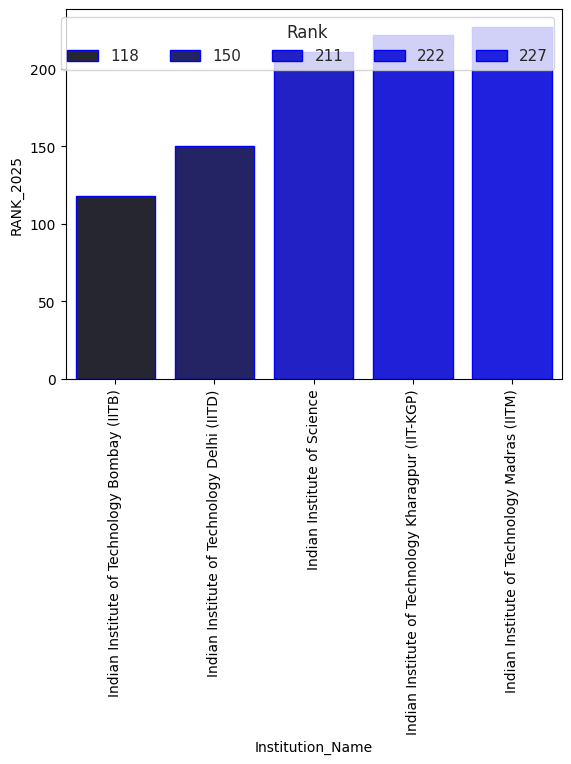

In [ ]:
fig,ax=plt.subplots()
sns.barplot(x=df_India_top.index.get_level_values('Institution_Name'),y=df_India_top.index.get_level_values('RANK_2025'),hue=df_India_top.index.get_level_values('RANK_2025'),palette='dark:b',edgecolor='blue')


plt.xticks(rotation=90)
sns.set_theme(style="white")
ax.invert_xaxis
plt.legend(ncols=5).set_title('Rank')
plt.show()

In [ ]:
df_India_top=df[df['Location']=='India']
df_swadesh=df_India_top.groupby(['Institution_Name','Location','Overall_Score']).size()
df_swadesh=df_swadesh.sort_index(level='Overall_Score').sort_values(ascending=True).tail()
df_swadesh=df_swadesh.reset_index(name='count')

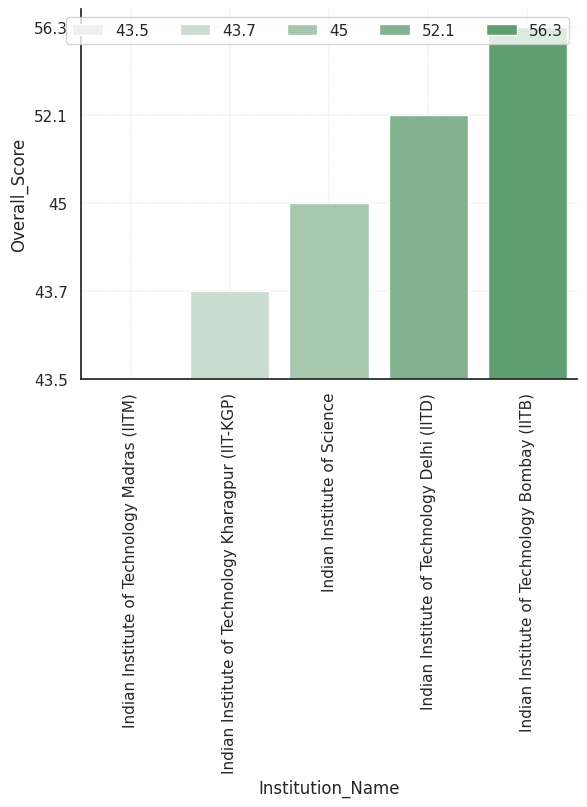

In [ ]:
fig,ax=plt.subplots()
sns.barplot(data=df_swadesh,x='Institution_Name',y='Overall_Score',hue='Overall_Score',palette='light:g')
ax.invert_yaxis()
plt.grid(True)
plt.grid(which='major', linestyle='--', linewidth=0.3)  # Customize grid
ax.spines[['top','right']].set_visible(False)
plt.legend().set_visible(False)
plt.legend(ncols=5)#.set_title('Overall Score')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# sns.relplot(data=df_swadesh,x='Institution_Name',y='Overall_Score',hue='Overall_Score',palette='light:g')
# plt.xticks(rotation=90)


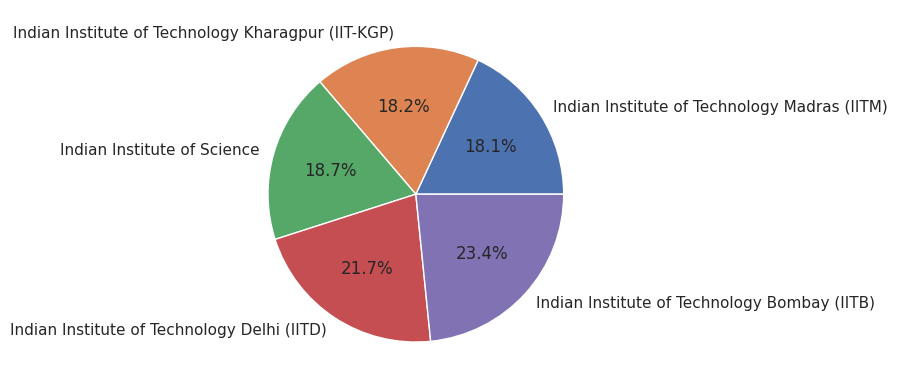

In [35]:
plt.pie(df_swadesh['Overall_Score'],labels=df_swadesh['Institution_Name'],autopct='%1.1f%%')
plt.title('Contribution of Top 5 Universities In India')
plt.show()